author: 

# Reading Data
You should use the code cell below to load your data.

In [90]:
# Retrieving Data
import requests
from pprint import pprint
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

data_dict = requests.get('https://think.cs.vt.edu/corgis/datasets/json/graduates/graduates.json').json()
pprint(data_dict[0])

[{'State': 'Alabama',
  'Total': {'Rate': 214.2, 'Number': 71529.0, 'Population': 33387205.0},
  'Rates': {'Age': {'< 18': 2.0,
    '18-45': 18.5,
    '45-64': 244.7,
    '> 64': 1017.8},
   'Age and Sex': {'< 18': {'Female': 2.0, 'Male': 2.1},
    '18 - 45': {'Female': 20.1, 'Male': 16.8},
    '45 - 64': {'Female': 201.0, 'Male': 291.5},
    '> 64': {'Female': 803.6, 'Male': 1308.6}},
   'Race': {'White': 186.1,
    'White non-Hispanic': 187.5,
    'Black': 216.1,
    'Asian': 81.3,
    'Indigenous': 69.9,
    'Hispanic': 66.5},
   'Race and Sex': {'Female': {'White': 149.2,
     'White non-Hispanic': 150.2,
     'Black': 167.2,
     'Black non-Hispanic': 167.9,
     'Asian': 84.9,
     'Indigenous': 53.8,
     'Hispanic': 58.3},
    'Male': {'White': 237.1,
     'White non-Hispanic': 239.2,
     'Black': 297.9,
     'Black non-Hispanic': 299.2,
     'Asian': 75.7,
     'Indigenous': 88.3,
     'Hispanic': 77.1}}},
  'Types': {'Breast': {'Total': 27.4,
    'Age': {'18 - 44': 5.1, '45 

You should use this markdown cell to state the source of your data and to explain why it is important.

The Source of this Data is the CORGIS Collection of JSON Datsets. This dataset is
important, because

The data in this library comes from the National Survey of Recent College Graduates.
Included is information about employment numbers, major information, and the earnings
of different majors. Many majors were not available before 2010, so their values have
been recorded as 0 (note that this may affect the averages shown in the bar charts).

# Convert to df
You should use the code cell below to process your data, in particular converting the data into pandas DataFrames.

In [91]:
# Data Cleaning and Preprocessing
data = pd.json_normalize(data_dict)
data.head()

,State,Total.Rate,Total.Number,Total.Population,Rates.Age.< 18,Rates.Age.18-45,Rates.Age.45-64,Rates.Age.> 64,Rates.Age and Sex.< 18.Female,Rates.Age and Sex.< 18.Male,...,Types.Lung.Age and Sex.Male.18 - 44,Types.Lung.Age and Sex.Male.45 - 64,Types.Lung.Age and Sex.Male.> 64,Types.Lung.Race.White,Types.Lung.Race.White non-Hispanic,Types.Lung.Race.Black,Types.Lung.Race.Black non-Hispanic,Types.Lung.Race.Asian,Types.Lung.Race.Indigenous,Types.Lung.Race.Hispanic
0,Alabama,214.2,71529.0,33387205.0,2.0,18.5,244.7,1017.8,2.0,2.1,...,2.4,102.9,457.4,59.9,60.4,52.6,52.8,23.0,22.9,14.8
1,Alaska,128.1,6361.0,4966180.0,1.7,11.8,170.9,965.2,0.0,0.0,...,0.0,50.3,335.0,48.7,49.5,45.6,47.9,33.0,74.4,0.0
2,Arizona,165.6,74286.0,44845598.0,2.5,13.6,173.6,840.2,2.6,2.5,...,0.8,47.0,275.8,39.5,42.2,38.2,40.4,21.3,11.1,21.6
3,Arkansas,223.9,45627.0,20382448.0,2.3,17.6,250.1,1048.3,2.6,2.0,...,1.8,106.5,484.7,63.4,64.2,62.9,63.0,18.1,16.2,14.6
4,California,150.9,393980.0,261135696.0,2.6,13.7,163.7,902.4,2.4,2.8,...,0.8,36.8,269.0,37.2,42.6,46.5,48.6,25.8,18.4,18.3


# Data exploration

In [92]:
data.columns

Index(['State', 'Total.Rate', 'Total.Number', 'Total.Population',
       'Rates.Age.< 18', 'Rates.Age.18-45', 'Rates.Age.45-64',
       'Rates.Age.> 64', 'Rates.Age and Sex.< 18.Female',
       'Rates.Age and Sex.< 18.Male', 'Rates.Age and Sex.18 - 45.Female',
       'Rates.Age and Sex.18 - 45.Male', 'Rates.Age and Sex.45 - 64.Female',
       'Rates.Age and Sex.45 - 64.Male', 'Rates.Age and Sex.> 64.Female',
       'Rates.Age and Sex.> 64.Male', 'Rates.Race.White',
       'Rates.Race.White non-Hispanic', 'Rates.Race.Black', 'Rates.Race.Asian',
       'Rates.Race.Indigenous', 'Rates.Race.Hispanic',
       'Rates.Race and Sex.Female.White',
       'Rates.Race and Sex.Female.White non-Hispanic',
       'Rates.Race and Sex.Female.Black',
       'Rates.Race and Sex.Female.Black non-Hispanic',
       'Rates.Race and Sex.Female.Asian',
       'Rates.Race and Sex.Female.Indigenous',
       'Rates.Race and Sex.Female.Hispanic', 'Rates.Race and Sex.Male.White',
       'Rates.Race and Sex.Male.Wh

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         51 non-null     object 
 1   Total.Rate                                    51 non-null     float64
 2   Total.Number                                  51 non-null     float64
 3   Total.Population                              51 non-null     float64
 4   Rates.Age.< 18                                51 non-null     float64
 5   Rates.Age.18-45                               51 non-null     float64
 6   Rates.Age.45-64                               51 non-null     float64
 7   Rates.Age.> 64                                51 non-null     float64
 8   Rates.Age and Sex.< 18.Female                 51 non-null     float64
 9   Rates.Age and Sex.< 18.Male                   51 non-null     float

# Feature Engineering
adding regions to have categorical data that could be a good target of modelling or comparison for clustering

In [94]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

regions = {
        'AK': 'Other',
        'AL': 'South',
        'AR': 'South',
        'AS': 'Other',
        'AZ': 'West',
        'CA': 'West',
        'CO': 'West',
        'CT': 'North East',
        'DC': 'North East',
        'DE': 'North East',
        'FL': 'South',
        'GA': 'South',
        'GU': 'Other',
        'HI': 'Other',
        'IA': 'Midwest',
        'ID': 'West',
        'IL': 'Midwest',
        'IN': 'Midwest',
        'KS': 'Midwest',
        'KY': 'South',
        'LA': 'South',
        'MA': 'North East',
        'MD': 'North East',
        'ME': 'North East',
        'MI': 'West',
        'MN': 'Midwest',
        'MO': 'Midwest',
        'MP': 'Other',
        'MS': 'South',
        'MT': 'West',
        'NA': 'Other',
        'NC': 'South',
        'ND': 'Midwest',
        'NE': 'West',
        'NH': 'North East',
        'NJ': 'North East',
        'NM': 'West',
        'NV': 'West',
        'NY': 'North East',
        'OH': 'Midwest',
        'OK': 'South',
        'OR': 'West',
        'PA': 'North East',
        'PR': 'Other',
        'RI': 'North East',
        'SC': 'South',
        'SD': 'Midwest',
        'TN': 'South',
        'TX': 'South',
        'UT': 'West',
        'VA': 'South',
        'VI': 'Other',
        'VT': 'North East',
        'WA': 'West',
        'WI': 'Midwest',
        'WV': 'South',
        'WY': 'West'
}

data['State Code'] = data['State'].map(us_state_abbrev)
data['Region'] = data['State Code'].map(regions).astype('category')
data.head()

,State,Total.Rate,Total.Number,Total.Population,Rates.Age.< 18,Rates.Age.18-45,Rates.Age.45-64,Rates.Age.> 64,Rates.Age and Sex.< 18.Female,Rates.Age and Sex.< 18.Male,...,Types.Lung.Age and Sex.Male.> 64,Types.Lung.Race.White,Types.Lung.Race.White non-Hispanic,Types.Lung.Race.Black,Types.Lung.Race.Black non-Hispanic,Types.Lung.Race.Asian,Types.Lung.Race.Indigenous,Types.Lung.Race.Hispanic,State Code,Region
0,Alabama,214.2,71529.0,33387205.0,2.0,18.5,244.7,1017.8,2.0,2.1,...,457.4,59.9,60.4,52.6,52.8,23.0,22.9,14.8,AL,South
1,Alaska,128.1,6361.0,4966180.0,1.7,11.8,170.9,965.2,0.0,0.0,...,335.0,48.7,49.5,45.6,47.9,33.0,74.4,0.0,AK,Other
2,Arizona,165.6,74286.0,44845598.0,2.5,13.6,173.6,840.2,2.6,2.5,...,275.8,39.5,42.2,38.2,40.4,21.3,11.1,21.6,AZ,West
3,Arkansas,223.9,45627.0,20382448.0,2.3,17.6,250.1,1048.3,2.6,2.0,...,484.7,63.4,64.2,62.9,63.0,18.1,16.2,14.6,AR,South
4,California,150.9,393980.0,261135696.0,2.6,13.7,163.7,902.4,2.4,2.8,...,269.0,37.2,42.6,46.5,48.6,25.8,18.4,18.3,CA,West


# Exploratory Data visualization

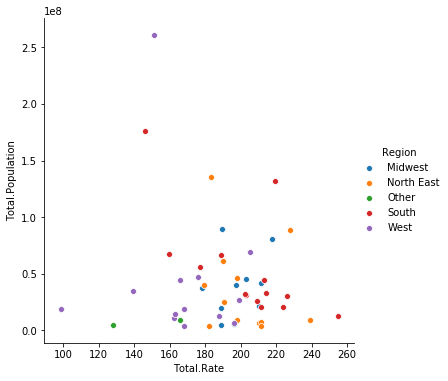

In [81]:
import seaborn as sns
sns.pairplot(x_vars=["Total.Rate"], y_vars=["Total.Population"], data=data, hue="Region", height=5)

No obvious region clusters on these axis

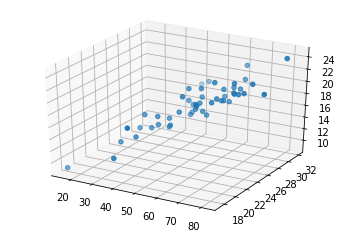

In [130]:
from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
threedee.scatter(data['Types.Lung.Total'], data['Types.Breast.Total'], data['Types.Colorectal.Total'])

No obvious disparity between 3 main rates

# Clustering - everything
Clustering on all data (not our regions!) then seeing if it provides any insights

In [131]:
data_for_clustering = data.drop('Region', axis=1).copy()
data_for_clustering = data_for_clustering.select_dtypes('number')
data_for_clustering.head()

,Total.Rate,Total.Number,Total.Population,Rates.Age.< 18,Rates.Age.18-45,Rates.Age.45-64,Rates.Age.> 64,Rates.Age and Sex.< 18.Female,Rates.Age and Sex.< 18.Male,Rates.Age and Sex.18 - 45.Female,...,Types.Lung.Age and Sex.Male.45 - 64,Types.Lung.Age and Sex.Male.> 64,Types.Lung.Race.White,Types.Lung.Race.White non-Hispanic,Types.Lung.Race.Black,Types.Lung.Race.Black non-Hispanic,Types.Lung.Race.Asian,Types.Lung.Race.Indigenous,Types.Lung.Race.Hispanic,Labels
0,214.2,71529.0,33387205.0,2.0,18.5,244.7,1017.8,2.0,2.1,20.1,...,102.9,457.4,59.9,60.4,52.6,52.8,23.0,22.9,14.8,0
1,128.1,6361.0,4966180.0,1.7,11.8,170.9,965.2,0.0,0.0,13.9,...,50.3,335.0,48.7,49.5,45.6,47.9,33.0,74.4,0.0,0
2,165.6,74286.0,44845598.0,2.5,13.6,173.6,840.2,2.6,2.5,15.2,...,47.0,275.8,39.5,42.2,38.2,40.4,21.3,11.1,21.6,0
3,223.9,45627.0,20382448.0,2.3,17.6,250.1,1048.3,2.6,2.0,19.5,...,106.5,484.7,63.4,64.2,62.9,63.0,18.1,16.2,14.6,0
4,150.9,393980.0,261135696.0,2.6,13.7,163.7,902.4,2.4,2.8,15.0,...,36.8,269.0,37.2,42.6,46.5,48.6,25.8,18.4,18.3,0


In [148]:
# Analyzing Data 1
from sklearn.cluster import MeanShift
from sklearn import preprocessing
model = MeanShift()
model.fit(data_for_clustering)
data['Labels']= model.labels_

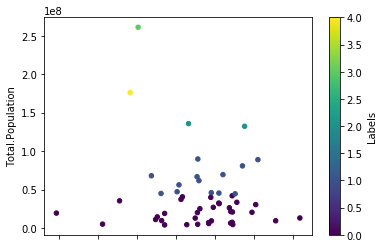

In [149]:
%matplotlib inline
data.plot.scatter(y='Total.Population', x='Total.Rate',c='Labels', colormap='viridis')

Clustering seems to heavily weigh population totals, let's try without those two?

# Clustering - no pop totals

In [150]:
model = MeanShift()
data_for_clustering_no_total = data_for_clustering.drop(['Total.Population', 'Total.Number'], axis=1)
model.fit(data_for_clustering_no_total)
data['Labels_no_total']= model.labels_

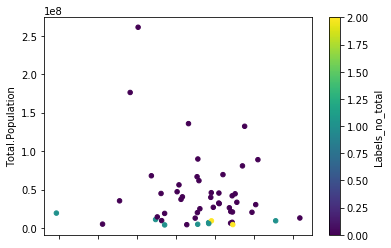

In [151]:
data.plot.scatter(y='Total.Population', x='Total.Rate',c='Labels_no_total', colormap='viridis')

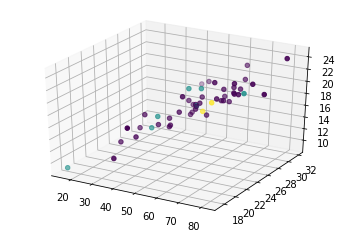

In [152]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(data['Types.Lung.Total'], data['Types.Breast.Total'], data['Types.Colorectal.Total'], c=data['Labels_no_total'], cmap='viridis')

# Correlation exploration

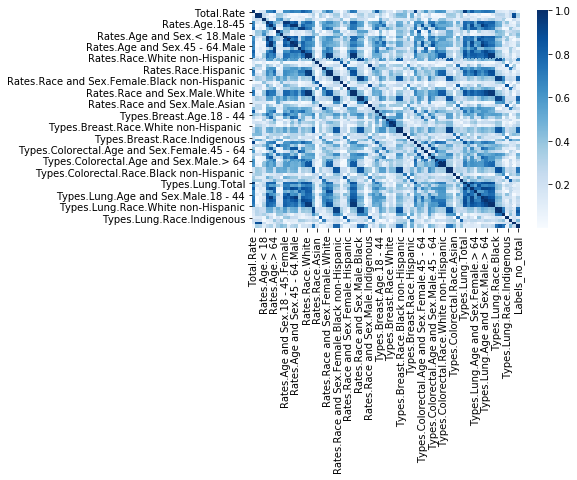

In [165]:
sns.heatmap(data.corr().abs(), cmap='Blues')

In [174]:
correlation_coeffs = data.corr().abs()['Types.Breast.Total'].sort_values(ascending=False)
correlation_coeffs

Types.Breast.Total               1.000000
Total.Rate                       0.839641
Types.Colorectal.Total           0.820604
Rates.Age.> 64                   0.754600
Rates.Age and Sex.> 64.Male      0.747194
                                   ...   
Labels                           0.071614
Rates.Age and Sex.< 18.Male      0.042524
Rates.Age.< 18                   0.025093
Rates.Age and Sex.< 18.Female    0.020051
Total.Population                 0.008988
Name: Types.Breast.Total, Length: 76, dtype: float64

In [177]:
cols_to_keep = correlation_coeffs[correlation_coeffs>0.6].index
cols_to_keep

Index(['Types.Breast.Total', 'Total.Rate', 'Types.Colorectal.Total',
       'Rates.Age.> 64', 'Rates.Age and Sex.> 64.Male', 'Types.Lung.Total',
       'Rates.Age and Sex.45 - 64.Female',
       'Types.Colorectal.Age and Sex.Female.> 64',
       'Rates.Age and Sex.> 64.Female',
       'Types.Lung.Age and Sex.Female.45 - 64', 'Rates.Age.45-64',
       'Types.Colorectal.Age and Sex.Male.> 64',
       'Types.Lung.Age and Sex.Male.45 - 64',
       'Rates.Age and Sex.45 - 64.Male'],
      dtype='object')

# Train / Test

In [164]:
train = data.sample(int(len(data)*.8), random_state=13)
test = data.loc[~data.index.isin(train.index)]

# Linear regression

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
features = ['Types.Colorectal.Total', 'Types.Lung.Total']
target = 'Types.Breast.Total'
model.fit(train[features], train[target])
predictions = model.predict(test[features])
rmse = mean_squared_error(predictions, test[target])**.5
rmse

1.1175809337062583

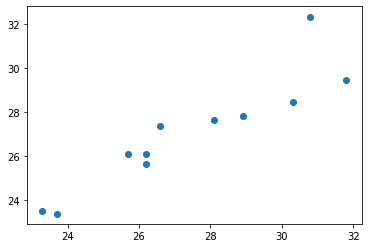

In [179]:
plt.scatter(test['Types.Breast.Total'], y=predictions)

# Dummy columns for region

In [186]:
col_dummies = pd.get_dummies(data['Region'], prefix='Region')
data = pd.concat([data, col_dummies], axis=1)
data.head()

,State,Total.Rate,Total.Number,Total.Population,Rates.Age.< 18,Rates.Age.18-45,Rates.Age.45-64,Rates.Age.> 64,Rates.Age and Sex.< 18.Female,Rates.Age and Sex.< 18.Male,...,Types.Lung.Race.Hispanic,State Code,Region,Labels,Labels_no_total,Region_Midwest,Region_North East,Region_Other,Region_South,Region_West
0,Alabama,214.2,71529.0,33387205.0,2.0,18.5,244.7,1017.8,2.0,2.1,...,14.8,AL,South,0,0,0,0,0,1,0
1,Alaska,128.1,6361.0,4966180.0,1.7,11.8,170.9,965.2,0.0,0.0,...,0.0,AK,Other,0,0,0,0,1,0,0
2,Arizona,165.6,74286.0,44845598.0,2.5,13.6,173.6,840.2,2.6,2.5,...,21.6,AZ,West,1,0,0,0,0,0,1
3,Arkansas,223.9,45627.0,20382448.0,2.3,17.6,250.1,1048.3,2.6,2.0,...,14.6,AR,South,0,0,0,0,0,1,0
4,California,150.9,393980.0,261135696.0,2.6,13.7,163.7,902.4,2.4,2.8,...,18.3,CA,West,3,0,0,0,0,0,1


In [194]:
data['Region'].cat.codes

0     3
1     2
2     4
3     3
4     4
5     4
6     1
7     1
8     1
9     3
10    3
11    2
12    4
13    0
14    0
15    0
16    0
17    3
18    3
19    1
20    1
21    1
22    4
23    0
24    3
25    0
26    4
27    4
28    4
29    1
30    1
31    4
32    1
33    3
34    0
35    0
36    3
37    4
38    1
39    1
40    3
41    0
42    3
43    3
44    4
45    1
46    3
47    4
48    3
49    0
50    4
dtype: int8

In [195]:
data['Region_code'] = data['Region'].cat.codes
data.head()

,State,Total.Rate,Total.Number,Total.Population,Rates.Age.< 18,Rates.Age.18-45,Rates.Age.45-64,Rates.Age.> 64,Rates.Age and Sex.< 18.Female,Rates.Age and Sex.< 18.Male,...,State Code,Region,Labels,Labels_no_total,Region_Midwest,Region_North East,Region_Other,Region_South,Region_West,Region_code
0,Alabama,214.2,71529.0,33387205.0,2.0,18.5,244.7,1017.8,2.0,2.1,...,AL,South,0,0,0,0,0,1,0,3
1,Alaska,128.1,6361.0,4966180.0,1.7,11.8,170.9,965.2,0.0,0.0,...,AK,Other,0,0,0,0,1,0,0,2
2,Arizona,165.6,74286.0,44845598.0,2.5,13.6,173.6,840.2,2.6,2.5,...,AZ,West,1,0,0,0,0,0,1,4
3,Arkansas,223.9,45627.0,20382448.0,2.3,17.6,250.1,1048.3,2.6,2.0,...,AR,South,0,0,0,0,0,1,0,3
4,California,150.9,393980.0,261135696.0,2.6,13.7,163.7,902.4,2.4,2.8,...,CA,West,3,0,0,0,0,0,1,4


In [196]:
train = data.sample(int(len(data)*.8), random_state=13)
test = data.loc[~data.index.isin(train.index)]

# Classification / decision tree

In [198]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score

model = DecisionTreeClassifier()
features =  ['Rates.Race.White', 'Rates.Race.White non-Hispanic', 'Rates.Race.Black', 'Rates.Race.Asian','Rates.Race.Indigenous', 'Rates.Race.Hispanic'] 
target = ['Region_code']
model.fit(train[features],train[target])
predictions = model.predict(test[features])

In [202]:
test['predictions'] = predictions
test[['Region_code','predictions']]

C:\Users\Lourenco\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Region_code,predictions
2,4,4
10,3,1
16,0,4
18,3,3
25,0,3
26,4,4
34,0,4
35,0,4
37,4,3
38,1,0
